In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data downloaded directly from the OFLC, with a handful of columns dropped (zip codes, etc.)
df = pd.read_csv('2017_visa_data_abr.csv', dtype={'NAICS_CODE':str})

In [3]:
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,ORIGINAL_CERT_DATE
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,...,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,RIVERWOODS,LAKE,IL,2016-03-01
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,...,TOWERS WATSON DATA SERVICES 2015 CSR PROFESSIO...,53000.0,57200.0,Year,N,N,RIVERWOODS,LAKE,IL,2016-03-08
2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,...,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,WASHINGTON,NaN,DC,2016-03-16
3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,17177 NORTH LAUREL PARK DR,LIVONIA,...,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,JERSEY CITY,HUDSON,NJ,NaN
4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,223 WEST NASH STREET,WILSON,...,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NEW YORK,NEW YORK,NY,2015-02-26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528146 entries, 0 to 528145
Data columns (total 32 columns):
CASE_NUMBER              528146 non-null object
CASE_STATUS              528146 non-null object
CASE_SUBMITTED           528146 non-null object
DECISION_DATE            528146 non-null object
VISA_CLASS               528146 non-null object
EMPLOYMENT_START_DATE    528129 non-null object
EMPLOYMENT_END_DATE      528129 non-null object
EMPLOYER_NAME            528103 non-null object
EMPLOYER_ADDRESS         528140 non-null object
EMPLOYER_CITY            528132 non-null object
EMPLOYER_STATE           528131 non-null object
EMPLOYER_COUNTRY         420434 non-null object
JOB_TITLE                528143 non-null object
SOC_CODE                 528146 non-null object
SOC_NAME                 528145 non-null object
NAICS_CODE               528140 non-null object
TOTAL_WORKERS            528146 non-null int64
FULL_TIME_POSITION       528142 non-null object
PREVAILING_WAGE          5

In [5]:
df['TOTAL_WORKERS'].sum()

1007294

In [6]:
#filter data to NJ employers only
nj_emp = df[df['EMPLOYER_STATE'] == 'NJ']

In [7]:
#automatically calculated columns for all "numerical" data. This is just to get a feel.
nj_emp.describe()

/Users/epetenko/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,TOTAL_WORKERS,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,64385.000000,6.438500e+04,64384.000000,64385.000000,64385.000000
mean,1.430768,6.968903e+04,2016.085829,74867.538521,9468.910327
std,2.639214,7.946550e+05,7.955649,30652.774101,30520.935706
min,1.000000,0.000000e+00,1.000000,11.250000,0.000000
25%,1.000000,5.591000e+04,NaN,60694.000000,0.000000
50%,1.000000,6.481300e+04,NaN,70000.000000,0.000000
75%,1.000000,7.617000e+04,NaN,84100.000000,0.000000
max,100.000000,2.016227e+08,2017.000000,969000.000000,500000.000000


In [8]:
#totals for numerical columns. Again, just a quick feel. Noted -- 92,120 total workers for 2017, a drop from 2016.
nj_emp.sum()

TOTAL_WORKERS            9.212000e+04
PREVAILING_WAGE          4.486928e+09
PW_SOURCE_YEAR           1.298037e+08
WAGE_RATE_OF_PAY_FROM    4.820346e+09
WAGE_RATE_OF_PAY_TO      6.096558e+08
dtype: float64

In [9]:
from datetime import datetime

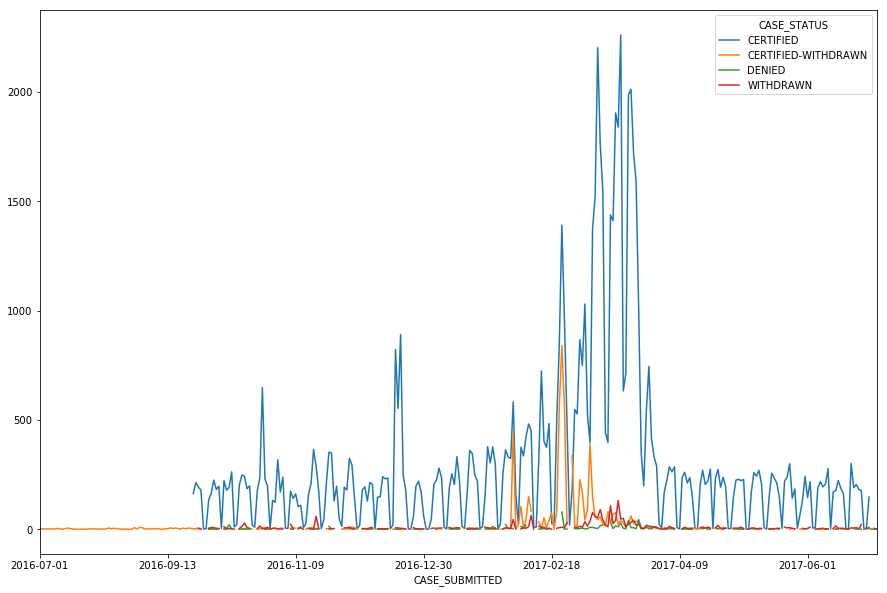

In [10]:
#out of all cases submitted during FY17, what is their status?
nj_emp[(nj_emp['CASE_SUBMITTED']>'2016-06-30')&(nj_emp['CASE_SUBMITTED']<'2017-06-30')].pivot_table(index='CASE_SUBMITTED', columns='CASE_STATUS', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

In [24]:
nj_emp[(nj_emp['CASE_SUBMITTED']>'2016-09-30')&(nj_emp['CASE_SUBMITTED']<'2017-06-30')].sum()

TOTAL_WORKERS            8.854200e+04
PREVAILING_WAGE          4.286534e+09
PW_SOURCE_YEAR           1.233672e+08
WAGE_RATE_OF_PAY_FROM    4.599704e+09
WAGE_RATE_OF_PAY_TO      5.707288e+08
dtype: float64

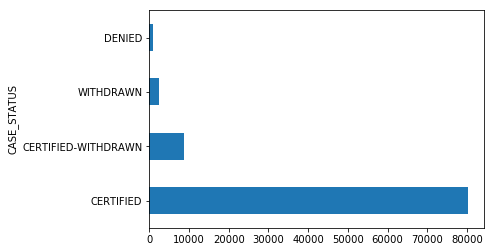

In [11]:
#dividing into status groups.
nj_emp.groupby('CASE_STATUS').sum().iloc[:,0].sort_values(ascending=False).plot(kind='barh');

In [12]:
#I was curious about the sudden spike in withdrawn applications
#it appears to most be because of one company
nj_emp[nj_emp['CASE_STATUS'] == 'CERTIFIED-WITHDRAWN'].groupby('EMPLOYER_NAME').sum().iloc[:,0].sort_values(ascending=False).head()

EMPLOYER_NAME
WIPRO LIMITED                     3825
WIPRO LLC                          797
APPLAB SYSTEMS, INC                353
SYNERZY SOFTWARE SOLUTIONS INC     193
AVIGHNA GLOBAL SOLUTIONS LLC       171
Name: TOTAL_WORKERS, dtype: int64

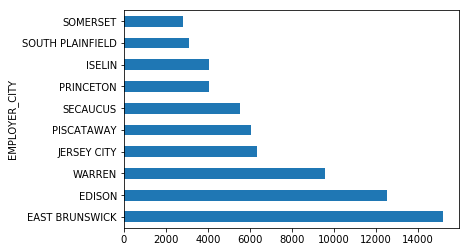

In [13]:
#top cities that employed H1B visa workers
nj_emp.groupby('EMPLOYER_CITY').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [14]:
#The national data filtered down to workers who physically worked in NJ
nj_work = df[df['WORKSITE_STATE'] == 'NJ']

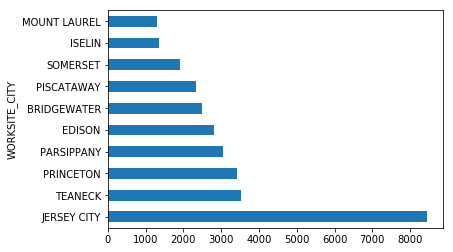

In [15]:
#top cities for H1B visa employees to work in
nj_work.groupby('WORKSITE_CITY').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

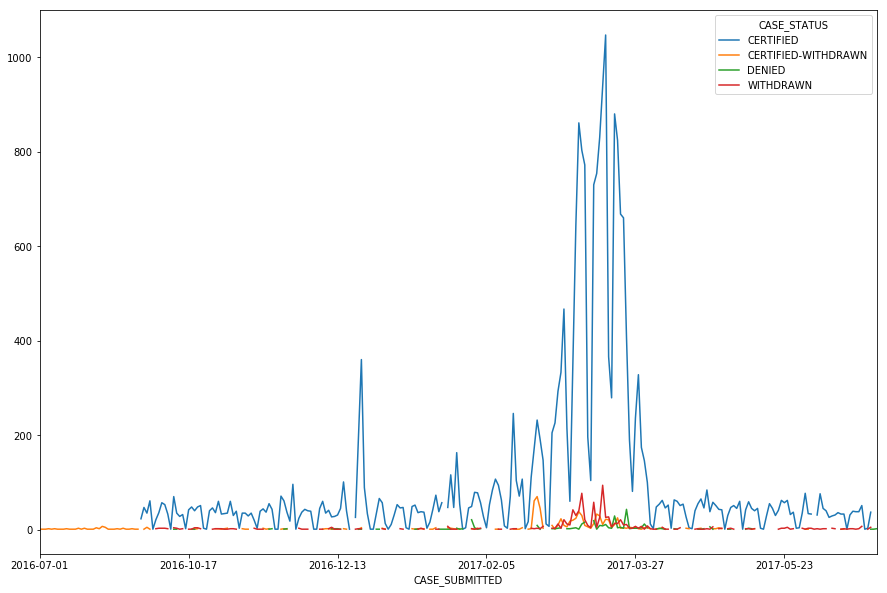

In [16]:
#same as above, but for place of work.
nj_work[(nj_work['CASE_SUBMITTED']>'2016-06-30')&(nj_emp['CASE_SUBMITTED']<'2017-06-30')].pivot_table(index='CASE_SUBMITTED', columns='CASE_STATUS', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

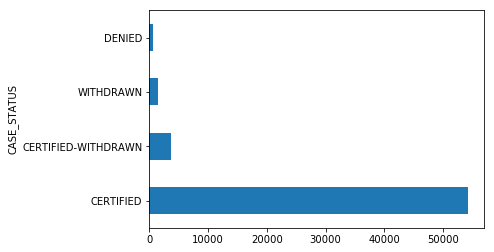

In [17]:
nj_work.groupby('CASE_STATUS').sum().iloc[:,0].sort_values(ascending=False).plot(kind='barh');

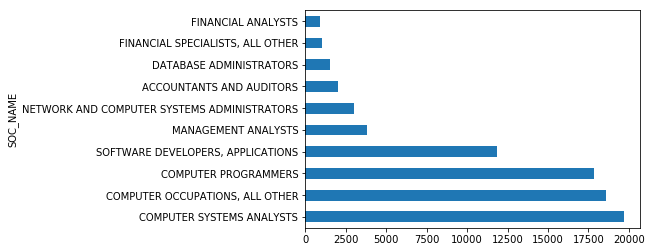

In [18]:
#top fields of employment for NJ employers
nj_emp.groupby('SOC_NAME').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [19]:
#total number of workers working for companies that are willful violators
nj_emp.groupby('WILLFUL_VIOLATOR').sum().iloc[:,0].sort_values(ascending=False).head(10)

WILLFUL_VIOLATOR
N    91395
Y      204
Name: TOTAL_WORKERS, dtype: int64

In [20]:
#unique number of companies that were listed as wilfull violators
nj_emp[nj_emp['WILLFUL_VIOLATOR'] == 'Y']['EMPLOYER_NAME'].nunique()

27

In [21]:
nj_emp['EMPLOYMENT_START_DATE'].unique()

array(['2016-08-25', '2016-08-26', '2016-08-29', '2016-09-22',
       '2016-09-23', '2016-09-02', '2016-08-01', '2016-03-21',
       '2016-07-01', '2016-09-21', '2017-02-28', '2016-10-03',
       '2016-09-27', '2016-12-01', '2017-03-16', '2017-01-30',
       '2016-10-04', '2016-10-01', '2016-09-28', '2016-12-07',
       '2016-10-17', '2016-10-11', '2016-10-05', '2016-11-05',
       '2017-02-13', '2016-10-10', '2016-10-12', '2017-03-11',
       '2017-02-08', '2016-12-20', '2016-11-01', '2016-11-21',
       '2017-02-22', '2016-12-30', '2017-03-18', '2017-03-07',
       '2016-10-07', '2017-01-27', '2017-02-10', '2017-02-24',
       '2016-10-30', '2016-10-15', '2017-03-22', '2017-01-29',
       '2016-10-06', '2016-11-11', '2016-11-13', '2017-03-26',
       '2017-03-27', '2017-02-26', '2016-09-30', '2017-03-03',
       '2017-01-25', '2016-12-16', '2017-01-01', '2017-03-06',
       '2015-08-01', '2014-08-01', '2016-09-06', '2016-10-24',
       '2016-12-25', '2017-01-11', '2016-12-31', '2016-

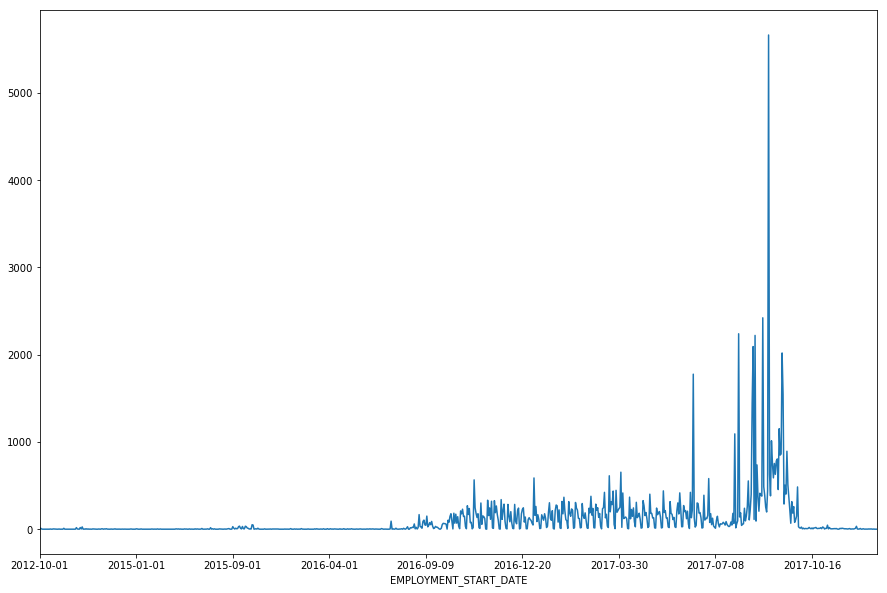

In [22]:
nj_emp.pivot_table(index='EMPLOYMENT_START_DATE', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

In [23]:
nj_emp.groupby('EMPLOYER_NAME').sum().iloc[:,0].sort_values(ascending=False).head(10)

EMPLOYER_NAME
WIPRO LIMITED                       12609
MINDTREE LIMITED                     9548
ERNST & YOUNG U.S. LLP               5152
WIPRO LLC                            2114
GOLDMAN, SACHS & CO.                 1918
L&T TECHNOLOGY SERVICES LIMITED      1539
LARSEN & TOUBRO INFOTECH LIMITED     1442
GOLDMAN SACHS SERVICES LLC           1396
BIRLASOFT INC                        1374
HEXAWARE TECHNOLOGIES, INC.          1051
Name: TOTAL_WORKERS, dtype: int64